# Data preprocessing: PCA

**NOTEBOOK GOAL**: Aggregate attributes into meaningful Principal Components

**DATASET TRANSFORMATION**: `preprocessed_(train|test).csv` >> `preprocessed_(train|test)_PCA.csv`


In [1]:
# reoder variables to work on train or test dataset
work_on = 'test'
#work_on = 'train'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('./dataset/preprocessed_' + work_on + '.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37586 entries, 0 to 37585
Data columns (total 55 columns):
StoreID                        37586 non-null int64
Date                           37586 non-null object
IsHoliday                      37586 non-null int64
HasPromotions                  37586 non-null int64
StoreType                      37586 non-null object
AssortmentType                 37586 non-null object
NearestCompetitor              37586 non-null int64
Region                         37586 non-null int64
Region_AreaKM2                 37586 non-null int64
Region_GDP                     37586 non-null int64
Region_PopulationK             37586 non-null int64
CloudCover                     37586 non-null float64
Events                         37586 non-null object
Max_Dew_PointC                 37586 non-null int64
Max_Humidity                   37586 non-null int64
Max_Sea_Level_PressurehPa      37586 non-null int64
Max_TemperatureC               37586 non-null int64
M

In [5]:
m = df.isnull().any()
print("========= COLUMNS WITH NULL VALUES =================")
print(m[m])
print("========= COLUMNS WITH INFINITE VALUES =================")
m = np.isfinite(df.select_dtypes(include=['float64'])).any()
print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover             True
Max_VisibilityKm       True
Mean_VisibilityKm      True
Min_VisibilitykM       True
Precipitationmm        True
MeanStoreSales         True
MeanRegionSales        True
MeanCustomers          True
MeanRegionCustomers    True
D_DayOfWeek_cos        True
D_DayOfWeek_sin        True
dtype: bool


Normalization

In [6]:
df = df.reset_index()

In [7]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm','Mean_VisibilityKm',
            'Events_Fog','Events_Hail','Events_Thunderstorm','Events_Rain','Events_Snow','Max_VisibilityKm',
            'Min_VisibilitykM']
# Separating out the features
x = df.loc[:, features].values
x
# Separating out the target
#y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.002836,0.005299,0.005150,0.003486,0.003451,0.003149,0.005613,0.005154,0.003932,0.001832,...,0.002851,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00733,0.000000,0.000000e+00,0.000000e+00
1,0.003782,0.005523,0.005145,0.001936,0.003643,0.003149,0.006212,0.005124,0.002621,0.002198,...,0.004277,0.019921,1.956490e-07,0.000000,0.000000,0.000000,0.00733,0.000000,1.956490e-07,1.956490e-07
2,0.001891,0.005578,0.005155,0.003098,0.003451,-0.001574,0.005538,0.005159,0.001966,0.004030,...,-0.002851,0.000000,3.912979e-07,0.011588,0.000000,0.000000,0.00733,0.000000,3.912979e-07,3.912979e-07
3,0.006618,0.004853,0.005130,0.003873,0.008052,0.001574,0.004865,0.005093,0.003932,0.008427,...,0.002851,0.000980,7.825958e-07,0.000000,0.000000,0.000000,0.00733,0.018155,7.825958e-07,7.825958e-07
4,0.002836,0.004853,0.005150,0.004260,0.007093,-0.001574,0.004865,0.005154,0.003932,0.006961,...,0.000000,0.002000,9.782448e-07,0.000000,0.000000,0.000000,0.00733,0.000000,9.782448e-07,9.782448e-07
5,0.001891,0.005578,0.005196,0.003098,0.006710,0.000000,0.005613,0.005184,0.002621,0.005129,...,0.001426,0.000980,1.173894e-06,0.000000,0.000000,0.027349,0.00733,0.000000,1.173894e-06,1.173894e-06
6,0.000945,0.005188,0.005231,0.003098,0.004026,-0.001574,0.004790,0.005240,0.002621,0.004763,...,0.001426,0.000000,1.369543e-06,0.000000,0.000000,0.000000,0.00733,0.000000,1.369543e-06,1.369543e-06
7,0.001891,0.005578,0.005236,0.003486,0.003451,0.000000,0.005538,0.005245,0.001966,0.001832,...,-0.002851,0.000000,1.565192e-06,0.000000,0.000000,0.000000,0.00000,0.000000,1.565192e-06,1.565192e-06
8,0.000945,0.005578,0.005221,0.004260,0.002492,-0.001574,0.005538,0.005225,0.001966,0.001099,...,-0.004277,0.000000,1.760841e-06,0.000000,0.000000,0.000000,0.00000,0.000000,1.760841e-06,1.760841e-06
9,0.005673,0.005467,0.005181,0.006197,0.004026,0.004723,0.005388,0.005184,0.005243,0.002198,...,0.000000,0.000000,2.152139e-06,0.000000,0.000000,0.000000,0.00000,0.000000,2.152139e-06,2.152139e-06


In [8]:
# remaining features after PCA
remaining_features = list(df.columns)

for f in features:
    print(f)
    remaining_features.remove(f)

remaining_features

Max_Dew_PointC
Max_Humidity
Max_Sea_Level_PressurehPa
Max_TemperatureC
Max_Wind_SpeedKm_h
Mean_Dew_PointC
Mean_Humidity
Mean_Sea_Level_PressurehPa
Mean_TemperatureC
Mean_Wind_SpeedKm_h
Min_Dew_PointC
Min_Humidity
Min_Sea_Level_PressurehPa
Min_TemperatureC
Precipitationmm
Mean_VisibilityKm
Events_Fog
Events_Hail
Events_Thunderstorm
Events_Rain
Events_Snow
Max_VisibilityKm
Min_VisibilitykM


['index',
 'StoreID',
 'Date',
 'IsHoliday',
 'HasPromotions',
 'StoreType',
 'AssortmentType',
 'NearestCompetitor',
 'Region',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'Events',
 'WindDirDegrees',
 'D_Day',
 'D_DayOfYear',
 'D_Month',
 'D_Year',
 'D_DayOfweek',
 'StoreType_SuperMarket',
 'StoreType_HyperMarket',
 'StoreType_StandardMarket',
 'StoreType_ShoppingCenter',
 'AssortmentType_General',
 'AssortmentType_WithNFDept',
 'AssortmentType_WithFishDept',
 'MeanStoreSales',
 'MeanRegionSales',
 'MeanCustomers',
 'MeanRegionCustomers',
 'D_DayOfWeek_cos',
 'D_DayOfWeek_sin']

Performing normalization

In [9]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [10]:
pca.explained_variance_ratio_

array([0.25174889, 0.20612377, 0.10038703, 0.09537898, 0.08058528,
       0.07313442, 0.05622994, 0.04906729, 0.03593161, 0.01949142,
       0.01758486, 0.00773   ])

These values represent the percentage of information each principal components provide

In [11]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([25.17, 45.78, 55.82, 65.36, 73.42, 80.73, 86.35, 91.26, 94.85,
       96.8 , 98.56, 99.33])

This array represents the total percentage of information available considering from 1 to n principal components

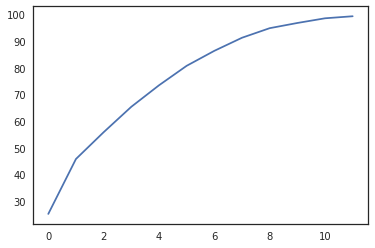

In [12]:
plt.plot(var1)

In [13]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

           0         1         2         3         4         5         6   \
p1   0.301866 -0.003096 -0.001537  0.117571  0.035646  0.513546  0.003589   
p2   0.007283  0.007964 -0.002203 -0.098777  0.183876 -0.016224  0.036372   
p3   0.035709  0.042019  0.000152  0.022185 -0.115233  0.126749  0.053527   
p4  -0.027111 -0.028214  0.000881  0.094779  0.044259 -0.101296 -0.074922   
p5  -0.000686  0.001092  0.000006  0.011111 -0.015938  0.012096 -0.001970   
p6  -0.003452  0.017230  0.000045 -0.074765  0.011935 -0.049813  0.041694   
p7   0.002087 -0.001807  0.000080  0.036297  0.078228  0.040976 -0.011237   
p8  -0.008993 -0.023709  0.000483  0.300364 -0.097370  0.001132 -0.121635   
p9   0.162550 -0.037972 -0.002873  0.157315  0.266592 -0.081316 -0.120087   
p10  0.186195  0.035458 -0.000447  0.026148  0.540944  0.175246  0.053717   
p11  0.495715  0.044530 -0.001116  0.264120 -0.075591  0.315177 -0.013147   
p12  0.272765  0.001418 -0.001303 -0.268207 -0.158029  0.345994  0.157352   

This values represent how the 18 attributes considered influence the weights
of the principal components vector

In [14]:
for x in features: 
    df = df.drop(x, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37586 entries, 0 to 37585
Data columns (total 33 columns):
index                          37586 non-null int64
StoreID                        37586 non-null int64
Date                           37586 non-null object
IsHoliday                      37586 non-null int64
HasPromotions                  37586 non-null int64
StoreType                      37586 non-null object
AssortmentType                 37586 non-null object
NearestCompetitor              37586 non-null int64
Region                         37586 non-null int64
Region_AreaKM2                 37586 non-null int64
Region_GDP                     37586 non-null int64
Region_PopulationK             37586 non-null int64
CloudCover                     37586 non-null float64
Events                         37586 non-null object
WindDirDegrees                 37586 non-null int64
D_Day                          37586 non-null int64
D_DayOfYear                    37586 non-null int64
D

In [15]:
finalDf=pd.concat([df,principalDf],axis=1)
finalDf

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.002890,-0.000325,0.007562,0.000579,-0.000524,-0.003730,-0.002314,-0.003077,0.000965,-0.000302
1,1,1000,02/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.003052,-0.007794,0.006873,0.009264,-0.011899,0.002262,-0.000431,-0.003722,-0.001108,0.000717
2,2,1000,03/03/2018,0,0,Hyper Market,General,326,7,9643,...,0.006493,-0.003377,0.007932,0.001550,-0.000773,-0.006173,0.002887,-0.001144,-0.000484,-0.002648
3,3,1000,05/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.006155,-0.007388,0.006974,-0.002662,0.011022,0.001034,0.005044,0.000446,0.003806,0.001605
4,4,1000,06/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.004216,0.000262,0.007314,0.001936,-0.001315,-0.003427,0.001078,0.001618,0.000030,-0.003867
5,5,1000,07/03/2018,0,1,Hyper Market,General,326,7,9643,...,0.006278,0.016091,0.009118,0.014187,0.008304,-0.002929,-0.002479,-0.002783,-0.001213,-0.001430
6,6,1000,08/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.003900,0.000503,0.007427,0.001184,-0.000638,-0.004437,-0.001050,-0.001967,-0.001285,-0.002340
7,7,1000,09/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.000901,0.000659,0.007727,0.001247,-0.001193,0.000944,-0.004694,0.000867,0.000157,0.000467
8,8,1000,10/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.000756,0.001207,0.007758,0.001475,-0.001546,0.001777,-0.004244,-0.000242,0.001080,-0.000572
9,9,1000,12/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.000868,0.000549,0.007807,-0.000224,-0.000261,0.002705,-0.003559,0.001910,0.002304,0.000503


In [16]:
finalDf.head()

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.002890,-0.000325,0.007562,0.000579,-0.000524,-0.003730,-0.002314,-0.003077,0.000965,-0.000302
1,1,1000,02/03/2018,0,0,Hyper Market,General,326,7,9643,...,-0.003052,-0.007794,0.006873,0.009264,-0.011899,0.002262,-0.000431,-0.003722,-0.001108,0.000717
2,2,1000,03/03/2018,0,0,Hyper Market,General,326,7,9643,...,0.006493,-0.003377,0.007932,0.001550,-0.000773,-0.006173,0.002887,-0.001144,-0.000484,-0.002648
3,3,1000,05/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.006155,-0.007388,0.006974,-0.002662,0.011022,0.001034,0.005044,0.000446,0.003806,0.001605
4,4,1000,06/03/2018,0,1,Hyper Market,General,326,7,9643,...,-0.004216,0.000262,0.007314,0.001936,-0.001315,-0.003427,0.001078,0.001618,0.000030,-0.003867


In [17]:
finalDf.drop(['index'],inplace=True,axis=1)

### Droppping Wind direction and event

In [18]:
finalDf.drop(['WindDirDegrees','Events'],axis=1, inplace=True)

In [19]:
print(finalDf.shape)
finalDf.head().T

(37586, 42)


,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2018,02/03/2018,03/03/2018,05/03/2018,06/03/2018
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,1,1
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [20]:
finalDf.to_csv('./dataset/preprocessed_' + work_on + '_PCA.csv')